# Learning Scikit-learn: Machine Learning in Python

## Estimating California house pricing using Linear Regression- More Advanced Techniques

In [1]:
%matplotlib inline

We want to solve a *regression* problem (we want to approximate a real function)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import *
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split


Import the California Housing dataset

In [3]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)


In [4]:
print(np.max(X), np.min(X), np.mean(X), np.max(y), np.min(y), np.mean(y))

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
dtype: float64 MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
dtype: float64 MedInc           3.870671
HouseAge        28.639486
AveRooms         5.429000
AveBedrms        1.096675
Population    1425.476744
AveOccup         3.070655
Latitude        35.631861
Longitude     -119.569704
dtype: float64 5.00001 0.14999 2.0685581690891843


## Another way to Select Features: SelectKBest

See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

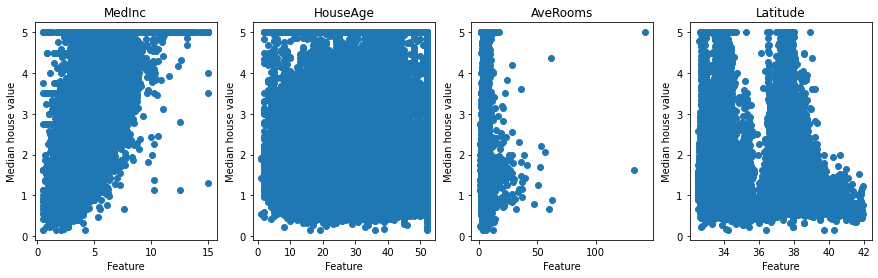

In [5]:

fs=SelectKBest(score_func=f_regression,k=4)
X_new=fs.fit_transform(X,y)

cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]


# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,4)
fig.set_size_inches(15,4)

for i in range(4):
    #axes[i].set_aspect('equal')
    axes[i].set_title(features_df_new.columns[i])
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Median house value')
    plt.sca(axes[i])

    
    plt.scatter(X_new[:,i],y)


### Split and Normalize data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features_df_new, y, test_size=0.25, random_state=33)

X_train.shape

print(np.max(X_train), np.min(X_train), np.mean(X_train))

MedInc       15.000100
HouseAge     52.000000
AveRooms    141.909091
Latitude     41.880000
dtype: float64 MedInc       0.499900
HouseAge     1.000000
AveRooms     0.846154
Latitude    32.560000
dtype: float64 MedInc       3.856408
HouseAge    28.715375
AveRooms     5.420960
Latitude    35.621047
dtype: float64


In [7]:
X_train = StandardScaler().fit_transform(X_train)
y_train = StandardScaler().fit_transform(y_train.array.reshape(-1,1))

X_test = StandardScaler().fit_transform(X_test)
y_test = StandardScaler().fit_transform(y_test.array.reshape(-1,1))


Start with a lineal model, SGDRegressor, that tries to find the hyperplane that minimizes a certain loss function (typically, the sum of squared distances from each instance to the hyperplane). It uses Stochastic Gradient Descent to find the minimum. 

In [8]:

def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [27]:

clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42, shuffle=False)
print(clf_sgd)
train_and_evaluate(clf_sgd,X_train,y_train.ravel())
print(clf_sgd.coef_)

SGDRegressor(penalty=None, random_state=42, shuffle=False)
Coefficient of determination on training set: 0.5076579761342432
Average coefficient of determination using 5-fold crossvalidation: 0.506551500733916
[ 0.70102487  0.17658108 -0.07544412 -0.07018425]


In [10]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd1,X_train,y_train.ravel())

Coefficient of determination on training set: 0.5056293527924056
Average coefficient of determination using 5-fold crossvalidation: 0.5062884645760322


In [11]:
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd2,X_train,y_train.ravel())

Coefficient of determination on training set: 0.5059786870834837
Average coefficient of determination using 5-fold crossvalidation: 0.5062898725253133


In [12]:
clf_sgd3 = linear_model.SGDRegressor(loss='squared_loss', penalty='elasticnet',  random_state=42)
train_and_evaluate(clf_sgd3,X_train,y_train.ravel())

Coefficient of determination on training set: 0.5056812638896454
Average coefficient of determination using 5-fold crossvalidation: 0.5062867673337561


### Ridge regression

In [13]:
clf_ridge = linear_model.Ridge()
train_and_evaluate(clf_ridge,X_train,y_train)

Coefficient of determination on training set: 0.5094294167570641
Average coefficient of determination using 5-fold crossvalidation: 0.5067248790855127


## SVR
In the docs, sklearn does not recommend using with "more than a couple of 10000 samples". They recommend using LinearSVR or SGDRegressor instead.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [14]:

%%time
#This takes a really long time! 
clf_svr_grid = GridSearchCV(estimator=svm.SVR(),
             param_grid={'C': [1, 5, 10], 'kernel': ('linear', 'poly', 'rbf')})

clf_svr_grid.fit(X_train,y_train.ravel())

CPU times: user 30min 18s, sys: 36.6 s, total: 30min 54s
Wall time: 31min 55s


GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 5, 10], 'kernel': ('linear', 'poly', 'rbf')})

In [20]:
clf_svr_grid.cv_results_

{'mean_fit_time': array([  9.99964614,  30.66226559,   7.50975404,  21.77574573,
         97.23125811,   8.74503236,  35.0806334 , 142.73694062,
         10.37442255]),
 'std_fit_time': array([ 0.59107943,  4.16001161,  0.25619516,  0.65114635, 37.38345625,
         0.0977277 ,  0.8389427 , 37.97156551,  0.59388626]),
 'mean_score_time': array([0.79127889, 0.89808674, 3.62094159, 0.79538956, 0.90296946,
        3.54197288, 0.79938736, 0.90384912, 3.56935663]),
 'std_score_time': array([0.0069894 , 0.00577135, 0.06632307, 0.00754004, 0.01466333,
        0.02041422, 0.01507103, 0.01916232, 0.11077518]),
 'param_C': masked_array(data=[1, 1, 1, 5, 5, 5, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'linear', 'poly', 'rbf',
                    'linear', 'poly', 'rbf'],
              mask=[False, False, False, 

In [22]:
clf_svr_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [24]:
clf_svr_best = svm.SVR(kernel='rbf', C=10)
train_and_evaluate(clf_svr_best, X_train,y_train.ravel())

Coefficient of determination on training set: 0.6076205844800497
Average coefficient of determination using 5-fold crossvalidation: 0.5908800448374834


In [15]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,y_train.ravel())

Coefficient of determination on training set: 0.14767818609716354
Average coefficient of determination using 5-fold crossvalidation: 0.1249262864601594


Finally, let's try again Random Forests, in their Extra Trees, and Regression version

In [16]:

clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,y_train.ravel())

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.5758410098490658


In [17]:
#print(clf_et.feature_importances_,boston.feature_names)

Finally, evaluate our classifiers on the testing set

In [25]:

def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        
    if show_r2_score:
        print("Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n")

        
measure_performance(X_test,y_test.ravel(),clf_et, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)



Coefficient of determination:0.582 

